# Hard Margin Case

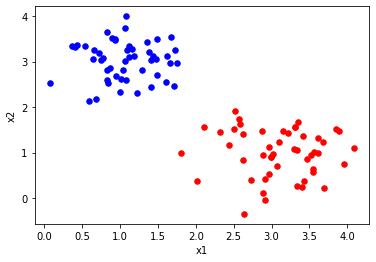

In [94]:
import numpy as np
import csv
from numpy import genfromtxt
import matplotlib.pyplot as plt
from cvxopt import matrix, solvers
from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers
import math
%matplotlib inline


# Use pandas to load data from files.
import pandas as pd

# Store the data from “X.csv” to X and target from “y.csv” to y
X = np.array(pd.read_csv('/X.csv'))
y = np.array(pd.read_csv('/y.csv'))


# Use np.where to find all index of data which y=1 and store them to idx_1
idx_1 = np.where(y==1)[0]
idx_2 = np.where(y==-1)[0]


# same as y=-1, store them to idx_2

# make the plot use plt.scatter(X[idx_1,0], X[idx_1,1], s=30, c='b', marker="o")
plt.scatter(X[idx_1,0], X[idx_1,1], s=30, c='r', marker="o")
plt.scatter(X[idx_2,0], X[idx_2,1], s=30, c='b', marker="o")

# Set the x label with x1 and y label with x2
plt.xlabel('x1')
plt.ylabel('x2')
# print(X[idx_2,1])
plt.show()


In [95]:
def linear_svm(X,y):
    solvers.options['show_progress'] = False
    #stored the shape of X to two variables: N,F
    N, F = X.shape
    # print(N,F)

    #created the Identity matrix using np.identity

    #created the Q matrix
    X1 = y * X
    Q = np.dot(X1, X1.T)*1.

    #using cvxopt.matrix to created a new variable p with value Q
    p = cvxopt_matrix(Q)

    #using cvxopt.matrix to create a new variable q with neagtive value np.zeros((N,1))
    q = cvxopt_matrix(-np.ones((N,1)))

    #using cvxopt.matrix converted the identity matrix of size N into into its neagtive value and store it in a variable: G
    G = cvxopt_matrix(-np.identity(N))

    #created a variable named h with value np.zeroes(N) and converted it to cvxopt
    h = cvxopt_matrix(np.zeros(N))
    
    # reshaped y
    A = cvxopt_matrix(y.reshape(1,-1))

    #created a variable named b with value np.zeroes(1) and converted it to cvxopt
    b = cvxopt_matrix(np.zeros(1))

    #solve the primal using cvxopt.solvers.qp
    sol = cvxopt_solvers.qp(p,q,G,h,A,b)

    #calculating the weight and bias and returning them through this function
    alphas = np.array(sol['x'])
    w = ((y * alphas).T @ X).reshape(-1,1)
    S = (alphas > 1e-4).flatten()
    w0 = y[S] - np.dot(X[S], w)

    return w, w0[0]



# fit svm classifier
w, w0 = linear_svm(X,y)
#print the weights
#print the bias
print("w = ", w.flatten())
print("w0 = ", w0)




w =  [ 1.42189318 -1.58830104]
w0 =  [0.46118099]


### Plotting the  decision boundary

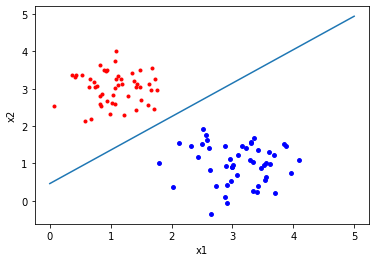

In [96]:
def plot_data_with_decision_boundary(X, y, w, w0, fig_size=(15,9), labels=['x1', 'x2']):
#     plotted the dataset
      plt.scatter(X[idx_1,0], X[idx_1,1], s=fig_size[0], c='b', marker="o")
      plt.scatter(X[idx_2,0], X[idx_2,1], s=fig_size[1], c='r', marker="o")

      # Set the x label with x1 and y label with x2
      plt.xlabel(labels[0])
      plt.ylabel(labels[1])

#     find the slope of the decision boundary
      m = -(w0 / w[1]) / (w0 / w[0])

#     generate several x values np.arrange()
      x_values = np.arange(6)

#     calculate its y values using intercept and slope
      y_values = []
      for x in x_values:
        Y = x * m + w0
        y_values.append(Y)

#     plot a line
      
      plt.plot(x_values, y_values,)


      return m

# plotting the points and decision boundary using the above function   
m = plot_data_with_decision_boundary(X,y,w,w0)


Determine which points are closest to the decision boundary. What is the functional margin of the points closest to the decision boundary?   

In [97]:
# calculate distance from each point to the decision boundary
# find the nearest data points and its index.
def closest_distance(x1, y1, a, b, c):    
    dis = (abs(a * x1 + b * y1 + c)) / (math.sqrt(a * a + b * b)) 
    return dis, x1, y1
def closest_distance1(x1, y1, a, b, c):    
    dis = ((a * x1 + b * y1 + c)) / (math.sqrt(a * a + b * b)) 
    return dis
    
    
dis,x_val,y_val = closest_distance(X[idx_1[0],0], X[idx_1[0],1], w[0], w[1], w0)
min_diss = dis
min_diss2 = dis
dis_list = []
indx1 = idx_1[0]
indx2 = idx_1[0]
point_idx = []
main_list = []
sub_list = []

for i in range(len(idx_1)):
  dis,x0,y0 = closest_distance(X[idx_1[i],0], X[idx_1[i],1], w[0], w[1], w0)
  dis_list.append(dis)

 
  if(dis < min_diss and dis < min_diss2):
    min_diss = dis
    x_vall = x0
    y_vall = y0
    indx1 = idx_1[i]
  elif ( dis > min_diss and dis < min_diss2):
    min_diss2 = dis
    x_vall2 = x0
    y_vall2 = y0
    indx2 = idx_1[i]

point_idx.append(indx2)
    
point_idx.append(indx1)
sub_list.append(x_vall)
sub_list.append(y_vall)
main_list.append(sub_list)
sub_list = []

sub_list.append(x_vall2)
sub_list.append(y_vall2)
main_list.append(sub_list)
sub_list = []

# print(x_vall,y_vall,indx1)
# print(x_vall2,y_vall2,indx2)

print("==============")

dis,x_val,y_val = closest_distance(X[idx_2[0],0], X[idx_2[0],1], w[0], w[1], w0)
min_dis = dis
min_dis2 = dis
index1 = idx_2[0]
index2 = idx_2[0]

for i in range(len(idx_2)):
  dis,x1,y1 = closest_distance(X[idx_2[i],0], X[idx_2[i],1], w[0], w[1], w0)
  dis_list.append(dis)

  if(dis < min_dis and dis < min_dis2):
    min_dis = dis
    x_val = x1
    y_val = y1
    index1 = idx_2[i]

  elif ( dis > min_dis and dis < min_dis2):
    min_dis2 = dis
    x_val2 = x1
    y_val2 = y1
    index2 = idx_2[i]


point_idx.append(index2)
sub_list.append(x_val2)
sub_list.append(y_val2)
main_list.append(sub_list)
sub_list = []  


# print(x_val,y_val,index1)
# print(x_val2,y_val2,index2)

print("MARGIN ", round(float(min(dis_list)),3) )

print("Points Idx : ", point_idx )

print("Points : ", main_list)



MARGIN  0.469
Points Idx :  [35, 48, 64]
Points :  [[2.5187963927498647, 1.9156572447102809], [2.5658805350656197, 1.7473917340854124], [1.4101058601349534, 2.4402427270560407]]


Write the decision function $f_{\texttt{primal}}({\bf x})$ to predict examples.  Use this function to predict the label of $(3.0, 1.5)^T$ and $(1.2, 3.0)^T$

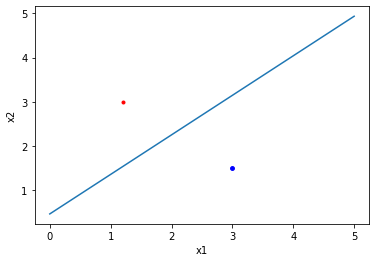

In [98]:
# using f_ primal() to predict (3.0, 1.5) and (1.2, 3.0) and plot the figure.
def f_primal(x): 
  dis = closest_distance1(x[0], x[1],w[1],w[0],w0)
  # return the predicted value (whether negative or positive) using svm primal
  if ( dis >= 0):
    return 'r'
  elif (dis < 0):
    return 'b'  
x = [3.0,1.5]
y = [1.2,3.0]  
dist = f_primal(x)
dist1 = f_primal(y)


# plot the dataset
plt.scatter(x[0], x[1], s=15, c=dist, marker="o")
plt.scatter(y[0], y[1], s=9, c=dist1, marker="o")


# Set the x label with x1 and y label with x2
plt.xlabel('x1')
plt.ylabel('x2')

#find the slope using the same weight and bias
m = -(w0 / w[1]) / (w0 / w[0])



#generate several x values np.arrange()
x_values = np.arange(6)
y_values = []
for x in x_values:
  Y = x * m + w0
  y_values.append(Y)

plt.plot(x_values, y_values)


